# 1. Fundamentals

Taught by: Dat Doan, Alex Ganose

## Getting started

Welcome to our first practical session! If you haven't used Jyupyter Book before or your Python is getting a little rusty, make sure you complete the [Python Refresher notebook](workshop-0.ipynb) before continuing.

The weekly notebooks are designed to be run online directly in your browser. You can activate the server by clicking the rocket icon on the top right and selecting `Live Code`.

## Outline

This workshop will cover the following content:

1. Linear regression and error metrics
1. Polynomial regression and over/underfitting
1. Logistic and softmax regression
1. *Advanced Topic*: Solving linear regression coefficients
1. Task: Regress the periodic table

## Linear regression

Linear regression is the simplest and most common form of regression. We'll explore more powerful forms of function fitting later in the course. There is no need to code linear regression from scratch as there is an optimised [class](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) already developed in the [scikit-learn](https://scikit-learn.org) package. The availability of well-developed libraries such as this are a major motiviation for using Python in data analytics.

In linear regression, the response variable is a linear function of the input parameters:

$$
y = \beta_0 + \beta_1x
$$

Let's start by generating some random data we can use for fitting. We can store them in a Pandas DataFrame for easy manipulation.



In [174]:
import numpy as np
import pandas as pd

num_points = 10 

x = np.random.rand(num_points)
y = 4 + 5 * x + np.random.randn(num_points)

df = pd.DataFrame({'x': x, 'y': y})
df


,x,y
0,0.134725,5.739665
1,0.141714,3.614184
2,0.660115,6.438932
3,0.306747,3.282146
4,0.869008,7.720868
5,0.964763,8.368934
6,0.104713,4.752087
7,0.577213,8.466095
8,0.223899,4.308694
9,0.432949,6.719937


<details>
<summary> Code hint </summary>
You need to choose the number of points. 10 should be fine, but you have the power to decide.
</details>

Let's plot the data using matplotlib.

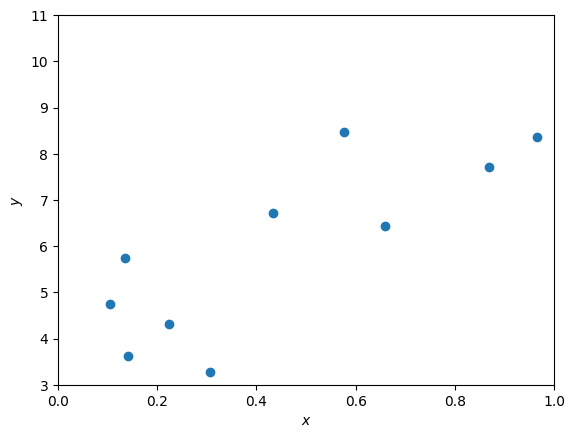

In [175]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set(
    xlabel='$x$',
    ylabel="$y$",
    xlim=(0, 1),
    ylim=(3, 11),
)
plt.show()

Now we can train a linear regression model using scikit-learn. We will use the `LinearRegression` class from the `linear_model` module. The `fit` method is used to train the model. 

In [176]:
from sklearn.linear_model import LinearRegression

X = df.x.values.reshape(-1, 1)  # sklearn expects the features to be a 2D array
y = df.y.values
model = LinearRegression().fit(X, y)

We can explore the fitted model parameters using the `intercept_` ($\beta_0$) and `coef_` ($\beta_1$) attributes of the fitted model.

In [177]:
print('Slope:', model.coef_)
print('Intercept:', model.intercept_)

Slope: [4.91036427]
Intercept: 3.7728129945344784


We can now plot the line of best fit on top of the data.

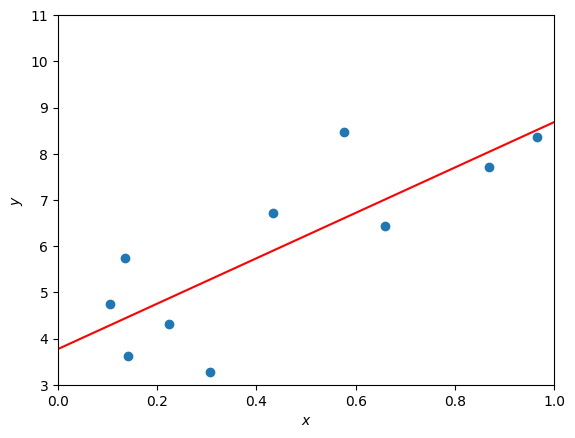

In [178]:
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot([0, 1], [model.intercept_, model.intercept_ + model.coef_[0]], color='red')
ax.set(
    xlabel='$x$',
    ylabel="$y$",
    xlim=(0, 1),
    ylim=(3, 11),
)
plt.show()

We can use the trained model to make predictions on new data using the `predict` function. The `fit` and `predict` function names will be the same for all scikit-learn models.

In [179]:
y_pred = model.predict(X)

We can now calculate the residuals and calculate error metrics for our model. Here, we will just calculate the mean absolute error (MAE). Other error metrics will be covered in workshop 2.



In [180]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y, y_pred)

# note, MAE is just as easily calculated using numpy too
mae = np.mean(np.abs(y - y_pred))

print(f'Mean Absolute Error: {mae:.2f}')

Mean Absolute Error: 0.89


We can plot a final graph showing the interpretation of MAE.

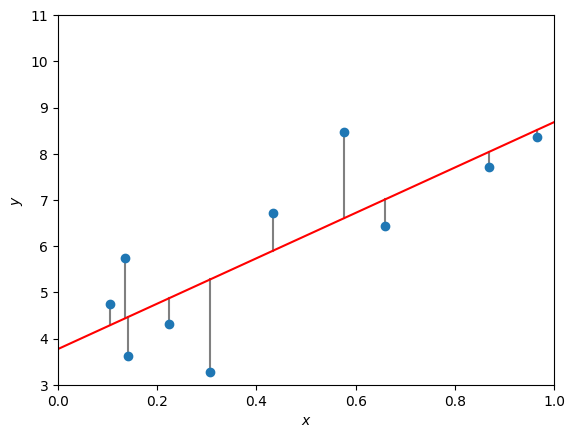

In [181]:
fig, ax = plt.subplots()

ax.scatter(x, y)
ax.plot(x.repeat(2).reshape(-1, 2).T, np.c_[y, y_pred].T, c="grey", zorder=-1)
ax.plot([0, 1], [model.intercept_, model.intercept_ + model.coef_[0]], color='red')
ax.set(
    xlabel='$x$',
    ylabel="$y$",
    xlim=(0, 1),
    ylim=(3, 11),
)
plt.show()

## Polynomial regression

Linear regression is only suitable for linear problems. These only makeup a small fraction of the chemical problems you might be interested in.

One simple generalisation of linear regression is polynomial regression. Here the response variable depends on the powers of the input variables as
$$
y = \beta_0 + \beta_1 x + \beta_2 x + \cdots = \phi(\mathbf{x})^T\boldsymbol{\beta}
$$
where $\phi$ is the link/basis function. Many popular machine learning methods (e.g. SVMs, neural nets, decision trees, etc) can be seen as just different ways of estimating basis functions.

First we generate some noisy polynomial reference data and store it in a pandas DataFrame.

In [182]:
import numpy as np
import pandas as pd

num_points = 40

x = 6 * np.random.rand(num_points) - 3
y = 0.5 * x ** 2 + x + 2 + np.random.randn(num_points)

df = pd.DataFrame({'x': x, 'y': y})
df

,x,y
0,-0.035094,1.810959
1,-0.644363,2.475336
2,2.366518,6.344035
3,-1.497771,0.555919
4,2.660401,8.130021
5,1.537744,4.922169
6,-1.042273,1.104632
7,-2.922747,3.721693
8,-1.518307,2.654820
9,0.806795,2.679762


<details>
<summary> Code hint </summary>
You need to choose the number of points. 50 should be fine, but you have the power to decide.
</details>

Now plot the data.

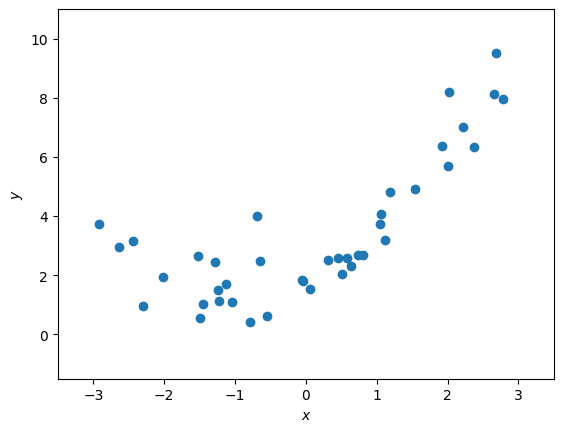

In [183]:
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set(
    xlabel='$x$',
    ylabel="$y$",
    xlim=(-3.5, 3.5),
    ylim=(-1.5, 11),
)
plt.show()

Scikit-learn doesn't have a `PolynomalRegression` class. Instead, we have to create powers of the features of manually and use these with `LinearRegression`.

To do this we can use the `PolynomialFeatures` class from the `preprocessing` module.

In [184]:
from sklearn.preprocessing import PolynomialFeatures

X = df.x.values.reshape(-1, 1)  # sklearn expects the features to be a 2D array

# here we do not include the bias in the polynomial features since this will
# be added automatically by the linear regression model
poly_features = PolynomialFeatures(degree=2, include_bias=False)

# we can now transform our features to include the polynomial features
X_poly = poly_features.fit_transform(X)
X_poly

array([[-3.50939624e-02,  1.23158620e-03],
       [-6.44363137e-01,  4.15203853e-01],
       [ 2.36651751e+00,  5.60040514e+00],
       [-1.49777142e+00,  2.24331923e+00],
       [ 2.66040068e+00,  7.07773180e+00],
       [ 1.53774385e+00,  2.36465614e+00],
       [-1.04227280e+00,  1.08633260e+00],
       [-2.92274664e+00,  8.54244790e+00],
       [-1.51830735e+00,  2.30525722e+00],
       [ 8.06795007e-01,  6.50918183e-01],
       [ 1.11027385e+00,  1.23270802e+00],
       [ 7.35786340e-01,  5.41381538e-01],
       [-2.30410656e+00,  5.30890705e+00],
       [ 5.82436687e-01,  3.39232494e-01],
       [ 3.05485304e-01,  9.33212712e-02],
       [ 4.52329416e-01,  2.04601900e-01],
       [ 2.68493370e+00,  7.20886900e+00],
       [ 2.02652892e+00,  4.10681946e+00],
       [ 5.77079972e-02,  3.33021294e-03],
       [ 1.91751317e+00,  3.67685674e+00],
       [ 5.14627585e-01,  2.64841551e-01],
       [-5.53413103e-01,  3.06266062e-01],
       [ 1.05462332e+00,  1.11223035e+00],
       [ 2.

Note, the first column of `X_poly` is the original feature, $x$, and the second column is $x^2$.
We can now train our model using the polynomial features. Note that we are now performing multivariate linear regression since we have more than one feature per sample.

In [186]:
model = LinearRegression()
model.fit(X_poly, y)

print('Slope:', model.coef_)
print('Intercept:', model.intercept_)

Slope: [1.04640809 0.52453038]
Intercept: 1.9742510054171958


How do the coefficients compare to the true values of the polynomial? You can check what these were when we defined the noisy training data.

We can plot the fitted polynomial against our training data and calculate the mean absolute error.


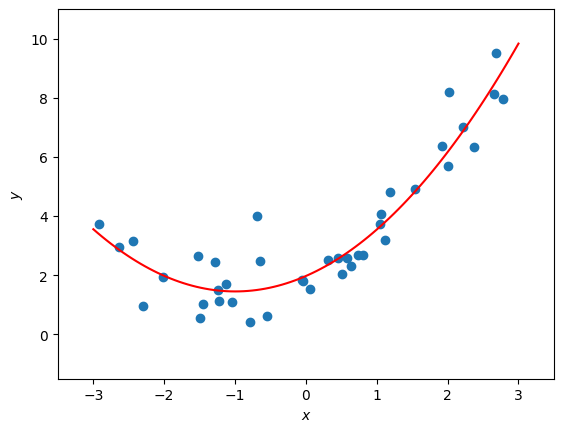

Mean Absolute Error: 0.60


In [187]:
# use the model to predict across the range of x values
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = model.predict(X_new_poly)

# plot the results
fig, ax = plt.subplots()
ax.scatter(X, y)
ax.plot(X_new, y_new, c="red")
ax.set(
    xlabel='$x$',
    ylabel="$y$",
    xlim=(-3.5, 3.5),
    ylim=(-1.5, 11),
)
plt.show()

# calculate the mean absolute error
y_pred = model.predict(X_poly)
mae = mean_absolute_error(y, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')

In general, the higher the degree of the polynomial, the better the model will fit the data. However, this can lead to overfitting, where the model is too closely tailored to the training data and does not generalize well to new, unseen data.

This is why it is important to evaluate the model on a separate test set to ensure that it is not overfitting. This will be discussed more in Workshop 2.


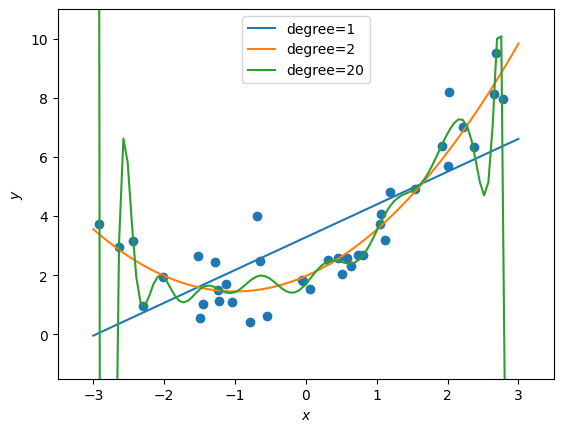

In [188]:
fig, ax = plt.subplots()
ax.scatter(x, y)

for degree in (1, 2, 20):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)
    y_new = model.predict(poly_features.transform(X_new))
    ax.plot(X_new, y_new, label=f'degree={degree}')

ax.set(
    xlabel='$x$',
    ylabel="$y$",
    xlim=(-3.5, 3.5),
    ylim=(-1.5, 11),
)
ax.legend()
plt.show()

The degree=1 model is underfit to the data while the degree=20 is overfit.

What happens if you set the maximum degree to 100? What do you think is happening here?

<details>
<summary> Hint </summary>
With very high polynomial degrees, you run into an issue called an explosion of terms. The large number of variables means each is given a very small weight (see the model coefficients). This can run into numerical stability issues. One way to avoid this problem is to scale the input features. This is a good idea in general for linear regression, but it is particularly important when using polynomial features.

You can achieve this using the `StandardScalar` class from the `preprocessing` module.

```python
from sklearn.preprocessing import StandardScaler

poly_features = PolynomialFeatures(degree=100, include_bias=False)
scaler = StandardScaler()
X_poly = poly_features.fit_transform(X)
X_scaled = scaler.fit_transform(X_poly)
model = LinearRegression()
model.fit(X_scaled, y)
y_new = model.predict(scaler.transform(poly_features.transform(X_new)))

fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(X_new, y_new, label=f'degree={degree}')
ax.set(xlabel='$x$', ylabel="$y$", xlim=(-3.5, 3.5), ylim=(-1.5, 11))
```
</details>

## Logisitic Regression

So far we have focussed on linear and non-linear regression which are suitable when predicting continuous response variables. For classification tasks, these approaches do not give realisitic results.

Instead, one of the simplest approaches for tackling these problems is logisitic regression. Here, we use sigmoid function as the basis, giving

$$
\phi(x) = \frac{e^{(\beta_0 + \beta_1 x)}}{1+e^{(\beta_0 + \beta_1 x)}} = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x)}}
$$

We can plot this function using matplotlib.


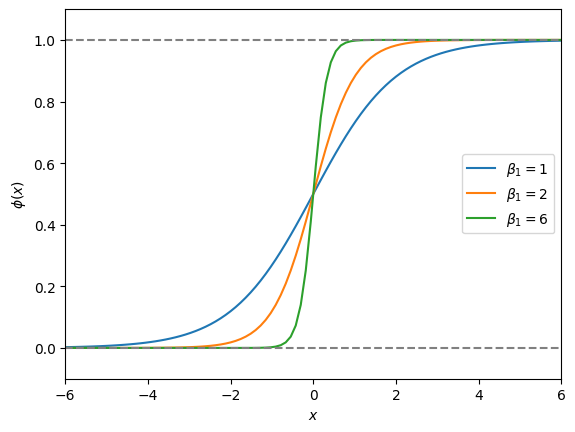

In [189]:
def sigmoid(x, beta0=0, beta1=1):
    return 1 / (1 + np.exp(-beta0 - beta1 * x))

fig, ax = plt.subplots()

x = np.linspace(-6, 6, 100)
for beta1 in (1, 2, 6):
    ax.plot(x, sigmoid(x, beta1=beta1), label=f'$\\beta_1={beta1}$')

ax.set(
    xlabel='$x$',
    ylabel=r"$\phi(x)$",
    xlim=(-6, 6),
    ylim=(-0.1, 1.1),
)
ax.legend()
ax.axhline(0, c='grey', ls='--')
ax.axhline(1, c='grey', ls='--')
plt.show()

Let's apply logistic regression to the iris dataset from sci-kit learn. 
This dataset contains 150 samples of iris flowers, each with four features. The target variable is the species of iris, which can be one of three possible values: setosa, versicolor, or virginica (given as integers 0, 1, and 2, respectively).

First, we load the dataset and create a pandas DataFrame object.

In [190]:
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(
    data=np.c_[iris['data'], iris['target']],
    columns=iris['feature_names'] + ['target'],
)
df.target = df.target.astype(int)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Play around with the dataset. What are the features and what ranges do they have? What is the target variable and what are the possible values it can take?

Let's now train a logistic regression model on the dataset. To begin with, we'll only using the petal length feature to predict the target (univariate regression).

In [202]:
from sklearn.linear_model import LogisticRegression

X = df[["petal width (cm)"]].values.reshape(-1, 1)
y = (df.target == 2).astype(int)  # 1 if Iris virginica, else 0

model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

We can look at the fitted model parameters for LogisticRegression in the same way as for LinearRegression. The naming is slightly confusing:
- `intercept_` ($\beta_0$): the log odds when the $x$ variable is 0.
- `coef_` ($\beta_1$): how much the log odds change with an increase (or decrease) in X by 1.0

In [203]:
print('β₀:', model.coef_)
print('β₁:', model.intercept_)

β₀: [[4.3330846]]
β₁: [-7.1947083]


For a visual intepretation of the results, we can plot the sigmoid function along with the data points and the decision boundary.

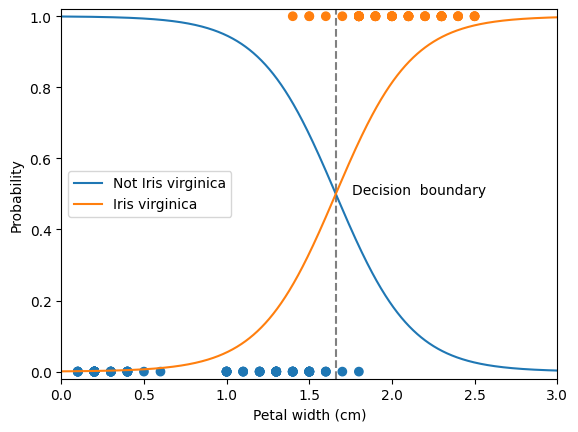

In [204]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_prob = model.predict_proba(X_new)
decision_boundary = X_new[y_prob[:, 1] >= 0.5][0]

fig, ax = plt.subplots()
ax.scatter(X, y, c=y, cmap='tab10', vmax=10)
ax.axvline(decision_boundary, color='grey', ls="--")
ax.plot(X_new, y_prob, label=['Not Iris virginica', 'Iris virginica'])
ax.text(decision_boundary + 0.1, 0.5, 'Decision  boundary', ha='left')
ax.legend(loc="center left")
ax.set(
    xlabel='Petal width (cm)', 
    ylabel='Probability', 
    xlim=[0, 3], 
    ylim=[-0.02, 1.02]
) 
plt.show()

What is the decision boundary for our logistic regression model?

For classiciation problems, we can't use MAE as an error metric. Instead, we'll use  log loss (otherwise called cross-entropy loss). This will be introduced in Workshop 2.

We can calculate the loss for our model.

In [231]:
from sklearn.metrics import log_loss

y_pred = model.predict(X)
loss = log_loss(y, y_pred)
print(f'Log loss: {loss:.2f}')

Log loss: 1.15


We can try improving our model by including more features. Let's extend the model to include both petal width and petal length.


In [244]:
X = df[["petal length (cm)", "petal width (cm)"]].values
model = LogisticRegression(solver = 'lbfgs', C = 10**10, random_state = 42)
model.fit(X, y)

y_pred = model.predict(X)
loss = log_loss(y, y_pred)
print(f'Log loss: {loss:.2f}')

Log loss: 1.38


We can see the loss has decreased!

We can plot the decision boundary in 2D.

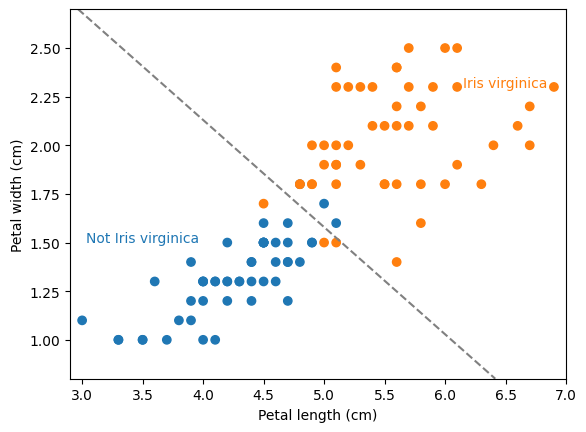

In [263]:
fig, ax = plt.subplots()
ax.scatter(*X.T, c=y, cmap='tab10', vmax=10)
ax.axline((0, -model.intercept_[0] / model.coef_[0][1]), slope=-model.coef_[0][0] / model.coef_[0][1], color='grey', ls='--')
ax.text(3.5, 1.5, 'Not Iris virginica', color='C0', ha='center')
ax.text(6.5, 2.3, 'Iris virginica', color='C1', ha='center')
ax.set(
    xlabel='Petal length (cm)',
    ylabel='Petal width (cm)',
    xlim=[2.9, 7],
    ylim=[0.8, 2.7]
)
plt.show()


## Softmax regression

We can further generalise logistic regression to support multiple classes by using softmax regression (also known as multinomial logistic regression). In this case, the model predicts the probability of each class and the class with the highest probability is selected as the predicted class.

The general concept is as follows: for any $x$, compute a score $s_k(x)$ for each class $k$ and then convert these scores to probabilities ($\hat{p}_k$) using the softmax function:

$$
\begin{align*}
s_k(x) &= \mathbf{x}^T \mathbf{\beta}_k \\
\hat p_k &= \sigma(s(x))_k = \frac{exp(s_k(x))}{\Sigma_{j=1}^K exp(s_j(x))}
\end{align*}
$$

We now use the full target value of the iris dataset, that can take values of 0, 1, and 2. The model will automatically detect that this is a multinomial problem.



In [313]:
X = df[["petal length (cm)", "petal width (cm)"]].values
y = df.target

model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

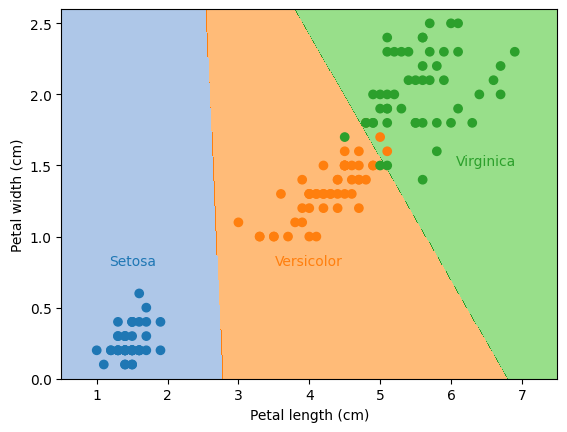

In [324]:
# generate a large number of points that cover the full space
x0, x1 = np.meshgrid(
    np.linspace(0, 8, 500).reshape(-1, 1),
    np.linspace(0, 3.5, 500).reshape(-1, 1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]

y_predict = model.predict(X_new)
zz = y_predict.reshape(x0.shape)

fig, ax = plt.subplots()
ax.scatter(*X.T, c=y, cmap='tab10', vmax=10)
ax.contourf(x0, x1, zz * 2 + 1.5, cmap="tab20", vmax=20, vmin=0, zorder=-1)
ax.set(
    xlabel='Petal length (cm)',
    ylabel='Petal width (cm)',
    xlim=[0.5, 7.5],
    ylim=[0, 2.6]
)
ax.text(1.5, 0.8, 'Setosa', color='C0', ha='center')
ax.text(4, 0.8, 'Versicolor', color='C1', ha='center')
ax.text(6.5, 1.5, 'Virginica', color='C2', ha='center')
plt.show()

## Advanced Topic: Solving linear regression coefficients

The analytical solution to the linear regression problem is given by the following formula:

$$
\boldsymbol{\beta} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$

Where $\mathbf{X}$ is the matrix of features for all samples. This is called the normal equation. Keep in mind that for many models, we can't derive analytical solutions. In those cases we need to make use of approximations as we will see further below. 

Let's calculate the coefficients for the simple linear regression example we used earlier. In order to do this, we need to include a column of ones in the feature matrix $\mathbf{X}$ to account for the intercept term. For example, our feature matrix $\mathbf{X}$ will look like this:

$$
\mathbf{X} = \begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_n
\end{bmatrix}
$$

Similarly, the coefficient vector $\boldsymbol{\beta}$ will look like this:

$$
\boldsymbol{\beta} = \begin{bmatrix}
\beta_0 \\
\beta_1
\end{bmatrix}
$$

First, let's create some test data.

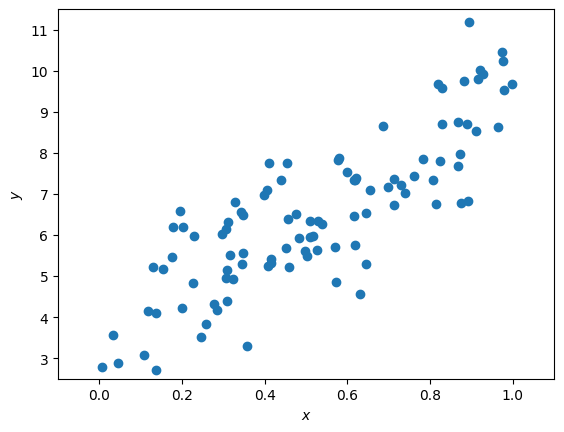

In [375]:
num_points = 100
x = np.random.rand(num_points)
y = 4 + 5 * x + np.random.randn(num_points)

fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set(
    xlabel='$x$',
    ylabel="$y$",
    xlim=(-0.1, 1.1),
    ylim=(2.5, 11.5),
)
plt.show()

Add the constant term to the features.

In [376]:
# add x0 = 1 to each data point
X_b = np.stack([np.ones(num_points), x], axis=1)
X_b

array([[1.        , 0.13025342],
       [1.        , 0.82864242],
       [1.        , 0.97641474],
       [1.        , 0.50952722],
       [1.        , 0.40486238],
       [1.        , 0.19467186],
       [1.        , 0.30961242],
       [1.        , 0.13815221],
       [1.        , 0.64606722],
       [1.        , 0.97844369],
       [1.        , 0.68510834],
       [1.        , 0.71378877],
       [1.        , 0.49680684],
       [1.        , 0.19929186],
       [1.        , 0.91644324],
       [1.        , 0.2280052 ],
       [1.        , 0.63089361],
       [1.        , 0.28351164],
       [1.        , 0.59966957],
       [1.        , 0.61719531],
       [1.        , 0.58058233],
       [1.        , 0.86739518],
       [1.        , 0.30736152],
       [1.        , 0.41407872],
       [1.        , 0.17863044],
       [1.        , 0.82471646],
       [1.        , 0.69900408],
       [1.        , 0.52741738],
       [1.        , 0.88231898],
       [1.        , 0.30943718],
       [1.

Finally, we can solve for the optimal values of $\beta$ using the normal equation:

In [377]:
beta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print('β₀:', beta[0])
print('β₁:', beta[1])

β₀: 3.4541161090885018
β₁: 5.828310129803029


Let's check the fit.

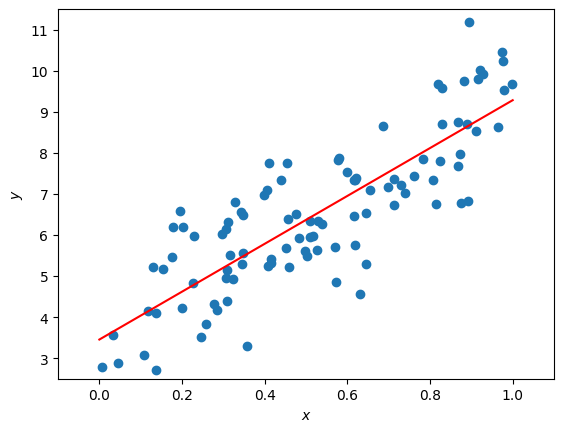

In [379]:
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot([0, 1], [beta[0], beta[0] + beta[1]], color='red')
ax.set(
    xlabel='$x$',
    ylabel="$y$",
    xlim=(-0.1, 1.1),
    ylim=(2.5, 11.5),
)
plt.show()

## Task: Regressing the periodic table

For this exercise, we're going to use a periodic table data set which has been uploaded to [GitHub](https://raw.githubusercontent.com/utf/DataAnalyticsChemistry/blob/main/datasets/periodic-table.csv). You should use the skills developed in this workshop to:
- Explore the data. What does each field mean? Plot some of the numeric data.
- Try a linear regression on atomic number and atomic weight.
- Can a softmax regression predict the phase at room temperature from the melting and boiling points.
- Think of any other questions you may be able to answer through linear or logistic regression

You should use your creativity to come up with novel approaches to understanding the dataset.

You can use pandas to load a dataframe directly from a website.

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/utf/DataAnalyticsChemistry/refs/heads/main/datasets/periodic-table.csv")
df

In [ ]:
# Your code here

## Additional reading

This notebook can be complimented with Chapter 1 of [Introduction to Statistical Learning](https://www.statlearning.com) for more background to the field.